# Approximation of mathematical functions

In [1]:
import math
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

## $\exp$

The Taylor series of $\exp(x)$ converges everywhere:

$$\exp(x) = e^x = \sum_{i=0}^\infty \frac {x^i} {i!}$$

In [2]:
def exp(x, n):
    "computes exp(x) with Taylor series approximation upto x^n"
    v = 1
    xi = x
    fact = 1
    for i in range(1, n+1):
        fact *= i
        v += xi/fact
        xi *= x
    return v

In [3]:
def plot_fun(f, mf, min=-5, max=5, logn_from=0, logn_till=4):
  x=numpy.linspace(min, max, 10000)
  plt.figure(figsize=(8, 3)).set_dpi(120)
  plt.axhline(0, ls='--', c='black', lw=0.5)
  plt.axvline(0, ls='--', c='black', lw=0.5)
  plt.plot(x, mf(x), label="exact", c='gray', lw=4)
  for logn in range(logn_from, logn_till):
      n = 2**logn
      y = [f(x_, n) for x_ in x]
      plt.plot(x, y, label=f"n={n}")
  plt.legend()

plot_fun(exp, numpy.exp)

However, the error will grow with the distance from 0. We can correct the error by computing the exponent of a small number and then multiplying by the exponent of the rest:

$$\exp(N + x) = e^Ne^x = e^N\exp(x)$$

Implemented properly, $e^N$ takes $\log N$ time to compute.

In [7]:
def exp2(x, n):
  e = 2.718281828459045
  v = 1
  if x > 1:
    pow = int(x)
    v *= e**pow
    x -= pow
  elif x < -1:
    pow = int(-x)
    v /= e**pow
    x += pow
  v *= exp(x, n)
  return v

plot_fun(exp2, numpy.exp)

In [5]:
print("n\tx\texp\t~exp\t~exp2\terr\terr2\n=====================================================")
for  logn in range(4):
  n = 2**logn
  for x in [-3.5, -1.5, 1.5, 3.5]:
    me = math.exp(x)
    e = exp(x, n)
    e2 = exp2(x, n)
    print(f"{n}\t{x}\t{me:.3f}\t{e:.3f}\t{e2:.3f}\t{abs(me - e):.3f}\t{abs(me - e2):.3f}")
  print("-----------------------------------------------------")

n	x	exp	~exp	~exp2	err	err2
1	-3.5	0.030	-2.500	0.025	2.530	0.005
1	-1.5	0.223	-0.500	0.184	0.723	0.039
1	1.5	4.482	2.500	4.077	1.982	0.404
1	3.5	33.115	4.500	30.128	28.615	2.987
-----------------------------------------------------
2	-3.5	0.030	3.625	0.031	3.595	0.001
2	-1.5	0.223	0.625	0.230	0.402	0.007
2	1.5	4.482	3.625	4.417	0.857	0.064
2	3.5	33.115	10.625	32.639	22.490	0.476
-----------------------------------------------------
4	-3.5	0.030	2.732	0.030	2.702	0.000
4	-1.5	0.223	0.273	0.223	0.050	0.000
4	1.5	4.482	4.398	4.481	0.083	0.001
4	3.5	33.115	24.023	33.110	9.092	0.006
-----------------------------------------------------
8	-3.5	0.030	0.190	0.030	0.160	0.000
8	-1.5	0.223	0.223	0.223	0.000	0.000
8	1.5	4.482	4.482	4.482	0.000	0.000
8	3.5	33.115	32.788	33.115	0.327	0.000
-----------------------------------------------------


## $\sin$

The Taylor series for the sine function is 

\begin{align}
\sin(x) &= x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \cdots \\[8pt]
& = \sum_{n=0}^\infty \frac{(-1)^n}{(2n+1)!}x^{2n+1} \\[8pt]
\end{align}

and should give reasonable results for small $x$. 

In [9]:
pi = 3.141592653589793
def sin(x, n):
  fact = 1
  val = x
  xi = x
  sign = 1
  for i in range(1, n+1):
    fact *= (2*i)*(2*i + 1)  
    xi *= x*x
    sign = -sign
    val += sign*xi/fact
  return val

For a small range the approximation will be fine:

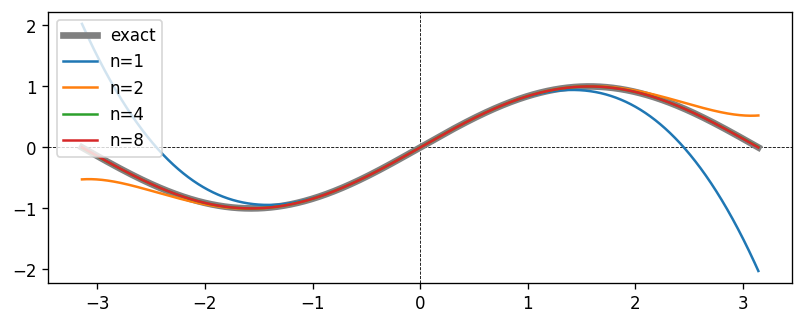

In [10]:
plot_fun(sin, numpy.sin, -pi, pi)

However, for large values of $x$ the values will quickly go out of control:

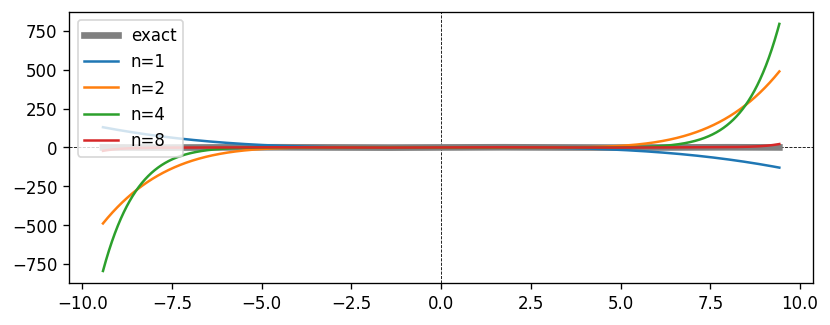

In [15]:
plot_fun(sin, numpy.sin, -3*pi, 3*pi)

We may use the fact that $\sin(x + \pi) = -\sin(x)$ to obtain a function with a more even error distribution.

In [9]:
def sin2(x, n):
   sgn = 1
   if x < 0:
     sgn = -sgn
     x = -x
   k = int(x/pi)
   x -= k*pi
   if k % 2 == 1:
     sgn = -sgn
   return sgn*sin(x, n)

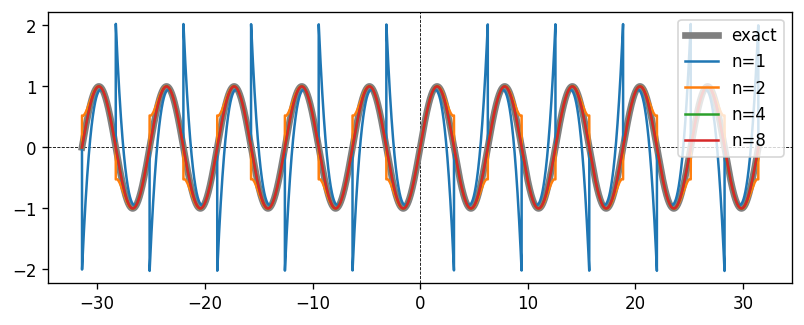

In [10]:
plot_fun(sin2, numpy.sin, -10*pi, 10*pi)

A further improvement can use the fact that $sin(\frac \pi 2 + x) = sin(\frac \pi 2 - x)$:

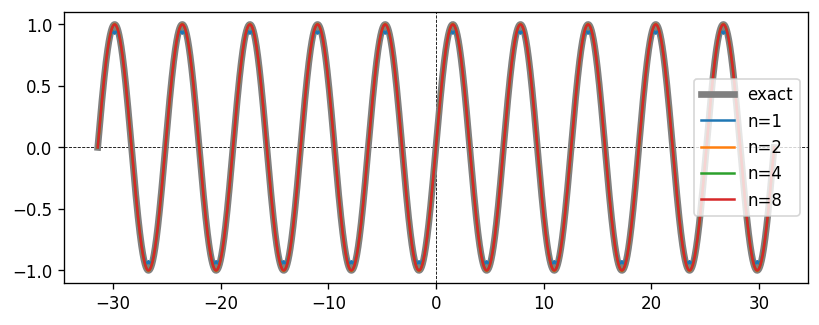

In [11]:
def sin3(x, n):
   sgn = 1
   if x < 0:
     sgn = -sgn
     x = -x
   k = int(x/pi)
   x -= k*pi
   if k % 2 == 1:
     sgn = -sgn
   if x > pi/2:
     x = pi - x
   return sgn*sin(x, n)

plot_fun(sin3, numpy.sin, -10*pi, 10*pi)

In [158]:
print("n\tx\tsin\t~sin\t~sin2\t~sin3\terr\terr2\terr3\n=====================================================================")
for  logn in range(4):
  n = 2**logn
  for x in [-7, -4, -2, 3, 5, 8]:
    me = math.sin(x)
    e = sin(x, n)
    e2 = sin2(x, n)
    e3 = sin3(x, n)
    print(f"{n}\t{x}\t{me:.3f}\t{e:.3f}\t{e2:.3f}\t{e3:.3f}\t{abs(me - e):.3f}\t{abs(me - e2):.3f}\t{abs(me - e3):.3f}")
  print("---------------------------------------------------------------------")

n	x	sin	~sin	~sin2	~sin3	err	err2	err3
1	-7	-0.657	50.167	-0.655	-0.655	50.824	0.002	0.002
1	-4	0.757	6.667	0.753	0.753	5.910	0.004	0.004
1	-2	-0.909	-0.667	-0.667	-0.894	0.243	0.243	0.016
1	3	0.141	-1.500	-1.500	0.141	1.641	1.641	0.000
1	5	-0.959	-15.833	-0.789	-0.931	14.874	0.170	0.028
1	8	0.989	-77.333	0.873	0.943	78.323	0.116	0.047
---------------------------------------------------------------------
2	-7	-0.657	-89.892	-0.657	-0.657	89.235	0.000	0.000
2	-4	0.757	-1.867	0.757	0.757	2.623	0.000	0.000
2	-2	-0.909	-0.933	-0.933	-0.910	0.024	0.024	0.000
2	3	0.141	0.525	0.525	0.141	0.384	0.384	0.000
2	5	-0.959	10.208	-0.973	-0.960	11.167	0.014	0.001
2	8	0.989	195.733	0.998	0.992	194.744	0.008	0.002
---------------------------------------------------------------------
4	-7	-0.657	-37.694	-0.657	-0.657	37.037	0.000	0.000
4	-4	0.757	0.662	0.757	0.757	0.095	0.000	0.000
4	-2	-0.909	-0.909	-0.909	-0.909	0.000	0.000	0.000
4	3	0.141	0.145	0.145	0.141	0.004	0.004	0.000
4	5	-0.959	0.090	-0.959	-0